In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="password",
    database="olist"
)

In [3]:
delivery_review_sql = """
    WITH reviews AS (
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
    	AVG(reviews.review_score) AS avg_review_score
    FROM
        reviews
    INNER JOIN
    	order_items
    ON
        reviews.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ),
    delivery AS (
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
        AVG(DATEDIFF(orders.order_delivered_customer_date, orders.order_purchase_timestamp)) AS actual_delivery_date,
        AVG(DATEDIFF(orders.order_delivered_customer_date, orders.order_estimated_delivery_date)) AS delay_delivery_date
    FROM
        orders
    INNER JOIN
    	order_items
    ON
        orders.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    )
    SELECT
        reviews.category_name,
        reviews.avg_review_score,
        delivery.actual_delivery_date,
        delivery.delay_delivery_date
    FROM
        reviews
    INNER JOIN
        delivery
    ON
        reviews.category_name = delivery.category_name
"""

In [4]:
delivery_review_df = pd.read_sql(delivery_review_sql, conn)
delivery_review_df.to_csv("delivery_review.csv", header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_40176\4271582262.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  delivery_review_df = pd.read_sql(delivery_review_sql, conn)


In [5]:
delivery_review_df

,category_name,avg_review_score,actual_delivery_date,delay_delivery_date
0,agro_industry_and_commerce,4.0000,11.5825,-11.4612
1,air_conditioning,3.9692,12.1938,-14.1696
2,art,3.9372,11.3046,-12.7766
3,arts_and_craftmanship,4.1250,5.6667,-6.7917
4,audio,3.8255,13.2680,-10.1492
...,...,...,...,...
66,stationery,4.1939,12.6715,-12.0389
67,tablets_printing_image,4.1235,12.9639,-12.7711
68,telephony,3.9469,12.7966,-11.3826
69,toys,4.1586,11.6330,-12.1032


C:\Users\minni\AppData\Local\Temp\ipykernel_40176\2172961216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(delivery_review_df["category_name"], rotation=90)


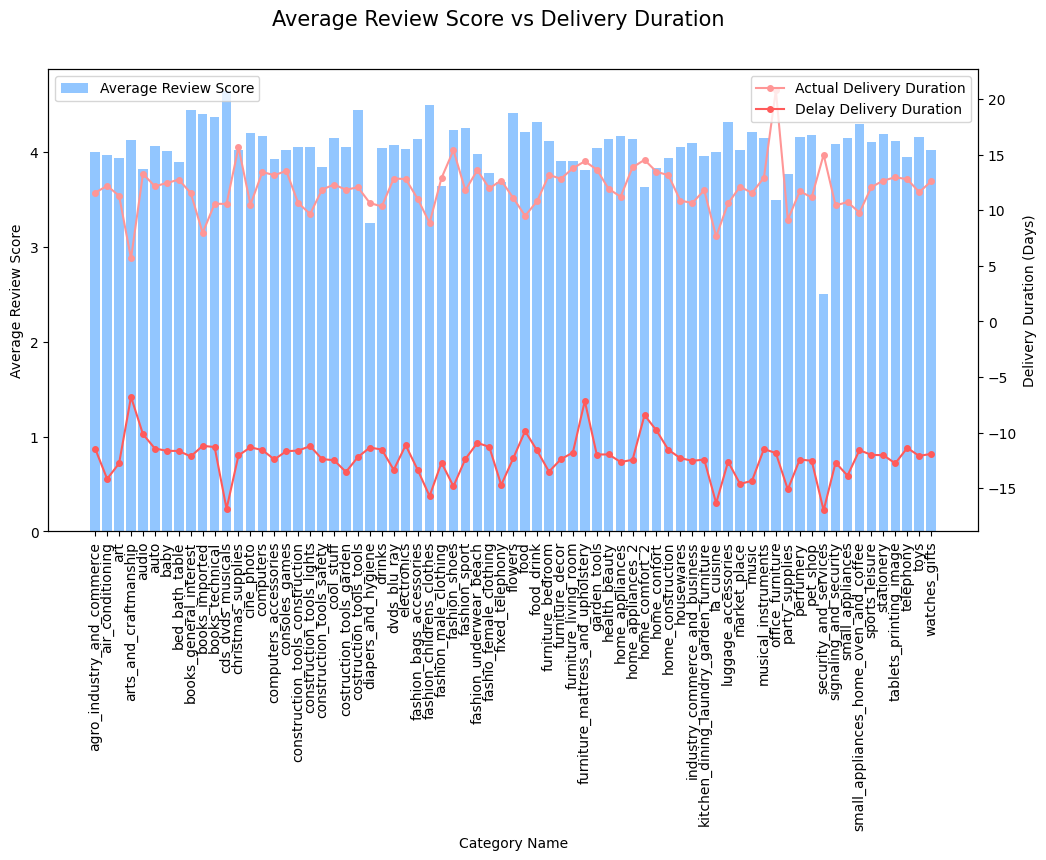

In [6]:
plt.style.use("seaborn-v0_8-pastel")
figure, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(delivery_review_df["category_name"], delivery_review_df["avg_review_score"], label="Average Review Score")
ax1.set_xlabel("Category Name")
ax1.set_ylabel("Average Review Score")
ax1.set_xticklabels(delivery_review_df["category_name"], rotation=90)

ax2 = ax1.twinx()
ax2.plot(delivery_review_df["category_name"], delivery_review_df["actual_delivery_date"], color="#FF9696", marker="o", markersize=4, label="Actual Delivery Duration")
ax2.plot(delivery_review_df["category_name"], delivery_review_df["delay_delivery_date"], color="#FF5A5A", marker="o", markersize=4, label="Delay Delivery Duration")
ax2.set_ylabel("Delivery Duration (Days)")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

figure.suptitle("Average Review Score vs Delivery Duration", size=15)
plt.savefig("delivery_review.png", bbox_inches='tight')